# Iris machine learning example

First handle all necessary imports:
* scatter matrix
* pyplot
* sklearn
* pandas
* mysql connector

In [1]:
import pandas
import mysql.connector

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Load data from MySQL database:

In [2]:
mydb = mysql.connector.connect  (   host="127.0.0.1", user="root", password="Vmcp2020Gain", database="MachineLearning"  )
mycursor = mydb.cursor()
query = "SELECT sepal_length, sepal_width, petal_length, petal_width, class FROM iris_ml"
mycursor.execute(query)
records = mycursor.fetchall()

Format database output into numerical format that Python can read:

In [3]:
dataset = pandas.DataFrame(records)
dataset.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset['sepal-length'] = pandas.to_numeric(dataset['sepal-length'])
dataset['sepal-width'] = pandas.to_numeric(dataset['sepal-width'])
dataset['petal-length'] = pandas.to_numeric(dataset['petal-length'])
dataset['petal-width'] = pandas.to_numeric(dataset['petal-width'])

Simple stats about the dataset (row, column):

In [4]:
print(dataset.shape)

(150, 5)


Display first 20 rows of dataset:

In [5]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

Full statistics of the dataset:

In [6]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


Show box & whisker plot:

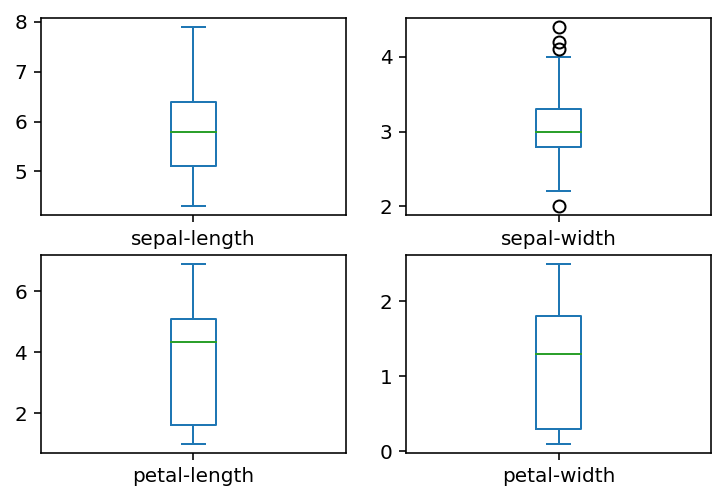

In [7]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Show histograms:

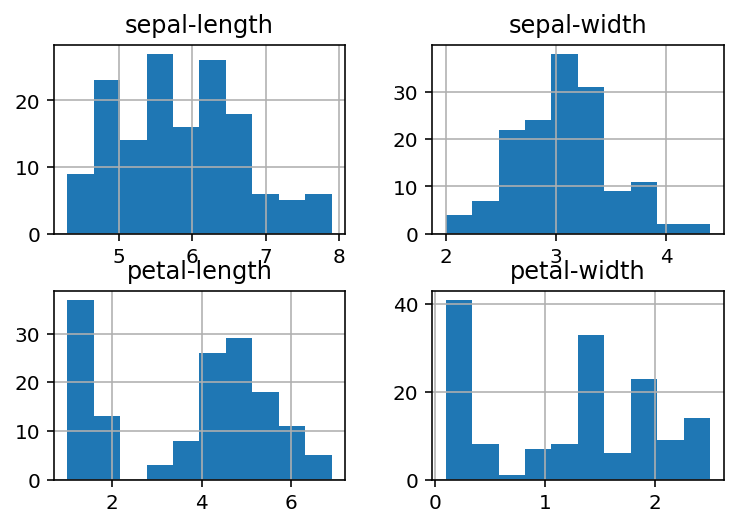

In [8]:
dataset.hist()
pyplot.show()

Show scatter matrix:

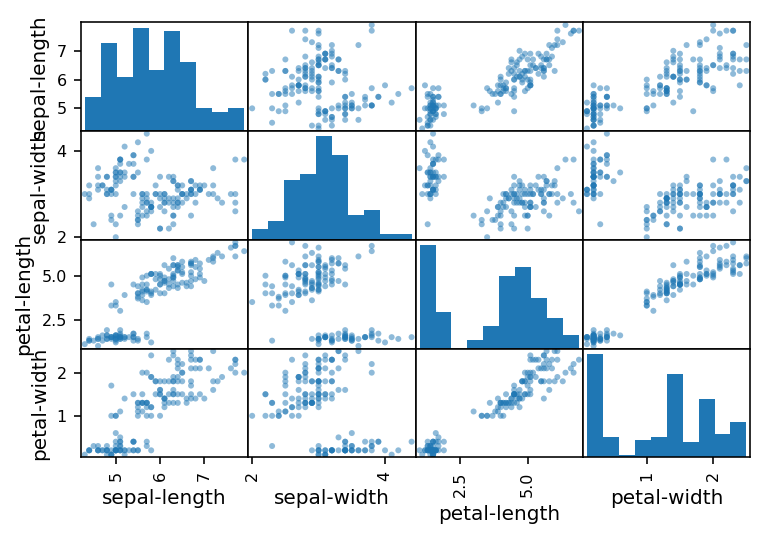

In [9]:
scatter_matrix(dataset)
pyplot.show()

Split the dataset into two sets, a training set and a validation set:

In [10]:
# extract all data from columns sepal_length, sepal_width, petal_length, petal_width 
array = dataset.values
X = array[:,0:4]
# extract all data from column class 
Y = array[:,4]
# split the data set into training data & validation data - 80% training, 20% testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=1)

Setup trials of six different machine learning models:
* Logistics Regression
* Linear Discrimination
* KNeighbours Classifier
* Decision Tree Classifier
* Gaussian Naive Bayes
* Support Vector Machine

In [11]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn. Output model name, model mean and model standard deviation:

In [12]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.941667 (0.053359)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


Plot comparison of different machine learning model:

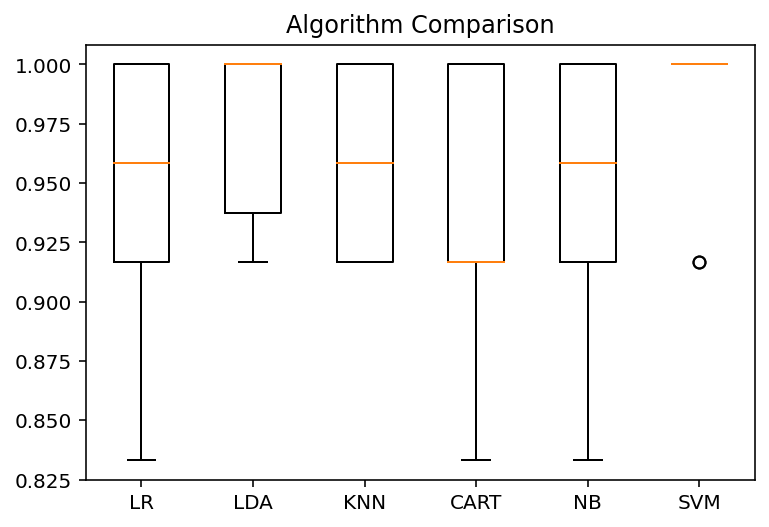

In [13]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

From the above algorithm comparison the SVM type is the best performing. Repeat the prediction this time using the validation data set:

In [14]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

Print the accuracy score:

In [15]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


Print the confusion matrix:

In [16]:
print(confusion_matrix(Y_validation, predictions))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


Print the classification report:

In [17]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

